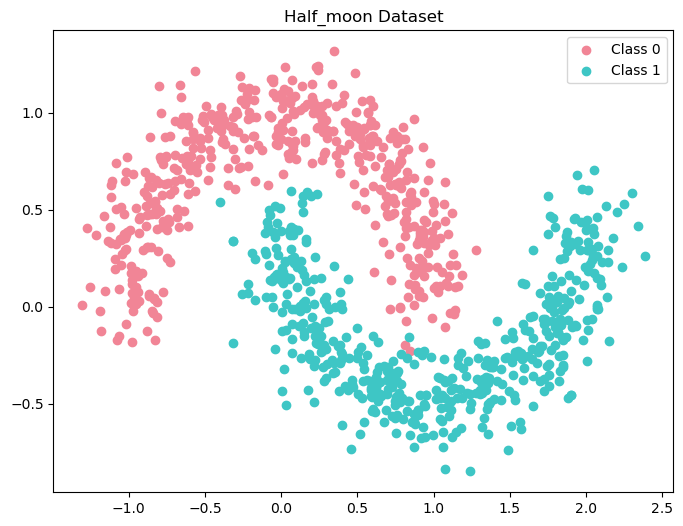

In [3]:
# create half_moon dataset
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import random
from matplotlib.colors import ListedColormap
import numpy as np


X, y = make_moons(n_samples=1000, noise=0.14, random_state=42)


plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='#f18596', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='#3ec6c5', label='Class 1')
plt.title('Half_moon Dataset')
plt.legend()
plt.savefig('half_moon_undivided.png', dpi=300)
plt.show()


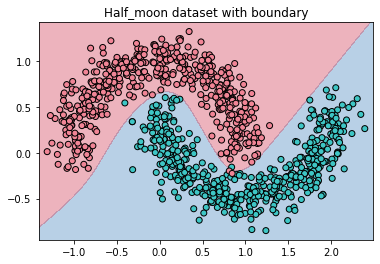

In [7]:
#input layers = 1
epochs = 160
input_size = 2
data_size = 1000
num_of_neurons = 5       #hidden layer of 5
num_of_categories = 2    #binary classification
W1 = np.random.rand(input_size,num_of_neurons)
W2 = np.random.rand(num_of_neurons,num_of_categories)
b1 = np.random.rand(num_of_neurons)
b2 = np.random.rand(num_of_categories)
epsilon = 0.004
reg_lambda = 0.05

for epoch in range(epochs):
    #Forward propagation
    z1 = X.dot(W1)+b1 
    a1 = np.tanh(z1)  
    z2 = a1.dot(W2)+b2
    exp_scores = np.exp(z2)
    probs = exp_scores/np.sum(exp_scores,axis=1,keepdims=True)
    #Backpropagation
    delta3 = probs
    delta3[range(data_size),y] -= 1
    dW2 = (a1.T).dot(delta3)
    db2 = np.sum(delta3,axis=0)
    delta2 = delta3.dot(W2.T)*(1 - np.power(a1,2))
    dW1 = np.dot(X.T,delta2)
    db1 = np.sum(delta2,axis=0)
    
    dW2 += reg_lambda*W2
    dW1 += reg_lambda*W1
    
    W1 += -epsilon*dW1
    b1 += -epsilon*db1
    W2 += -epsilon*dW2
    b2 += -epsilon*db2
    
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# calculate the probability of each grid points
grid_points = np.c_[xx.ravel(), yy.ravel()]
hidden_layer_input = np.dot(grid_points, W1)+b1
hidden_layer_output = np.tanh(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, W2)+b2
exp_scores = np.exp(output_layer_input)
predicted_grid_output = exp_scores/np.sum(exp_scores,axis=1,keepdims=True)


# write the boundary
plt.contourf(xx, yy, predicted_grid_output[:,0].reshape(xx.shape), levels=[0,0.5, 1], alpha=0.4, colors=['#4e8bc2', '#d2435c'])
cmap = ListedColormap(['#f18596', '#3ec6c5'])
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=cmap, edgecolor='k')
plt.title('Half_moon dataset with boundary')
plt.show()
    
    
    


